In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hirar_utils
from sklearn.cluster import AgglomerativeClustering

sb.set_theme()

# import data frames
%store -r final_data
# simplified dataframe with Principal components
%store -r data6D

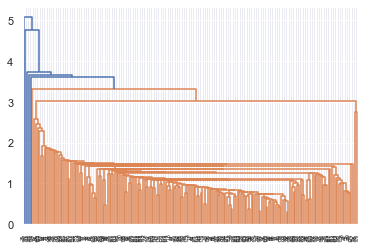

In [3]:
data6DCP = data6D.copy()
countries = data6DCP["Country"]
data6DCP = data6DCP.drop(columns=["Country"])

METHOD = 'single'
DISTANCE = 'euclidean'
dend = hirar_utils.dendrogram(hirar_utils.linkage(data6DCP, method=METHOD, metric=DISTANCE))